# Credit Card Fraud Detection

In this projects I am using 2 datasets 1 is training dataset and the other is for testing dataset. It has 1296675 rows × 23 columns on trainig dataset and 555719 rows × 23 columns in the test dataset where 22 columns are independent variables and the last column i.e., is_fraud is the target variable having binary classification with values 0 and 1. 1 represents Fraudlent and 0 represents Genuine

#### Import all the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Train dataset
df_train = pd.read_csv('Downloads/credit_card_fraud_codsoft/fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Test Dataset
df_test = pd.read_csv('Downloads/credit_card_fraud_codsoft/fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [9]:
# Dropping the unneccessary columns
df_train = df_train.drop(columns = ['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'lat', 'long', 'job', 'unix_time', 'merch_lat', 'merch_long','trans_num', 'street', 'city', 'state', 'zip' ])

In [10]:
# Dropping the unneccessary columns
df_test = df_test.drop(columns = ['Unnamed: 0', 'cc_num', 'merchant', 'first', 'last', 'lat', 'long', 'job', 'unix_time', 'merch_lat', 'merch_long','trans_num', 'street', 'city', 'state', 'zip'])

In [11]:
print("Train data :",df_train.is_fraud.value_counts())
print("\nTest data :",df_test.is_fraud.value_counts())

Train data : is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Test data : is_fraud
0    553574
1      2145
Name: count, dtype: int64


#### Now we need to convert the data type of trans_date_trans_time and dob from object to date type

In [12]:
# for train data
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])

# for test data
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city_pop               1296675 non-null  int64         
 5   dob                    1296675 non-null  datetime64[ns]
 6   is_fraud               1296675 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 69.3+ MB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city_pop               555719 non-null  int64         
 5   dob                    555719 non-null  datetime64[ns]
 6   is_fraud               555719 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 29.7+ MB


In [15]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [16]:
df.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0


#### Now as the time is in minutes and seconds we need to find out that on which half of the day the transactions have been occured. 
#### So for that we need to convert the time to hours and put some conditions and add a new column for it

In [17]:
df['hrs'] = df['trans_date_trans_time'].dt.hour

In [18]:
df['hrs'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

#### Now lets create a new categorical column based on the time of the day

In [19]:
def time_of_day(hour):
    if hour['hrs'] >= 4 and hour['hrs'] <= 7:
        val = 'morning'
    elif hour['hrs'] >= 8 and hour['hrs'] <= 15:
        val = 'afternoon'
    elif hour['hrs'] >= 16 and hour['hrs'] <= 19:
        val = 'evening'
    else:
        val = 'night'
    return val

In [20]:
df['time_of_day'] = df.apply(time_of_day, axis = 1)

In [21]:
df.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,hrs,time_of_day
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0,0,night
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0,0,night
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0,0,night
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0,0,night
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0,0,night


#### Now lets do the same thing for the age column by taking the dob column into consideration

In [22]:
# Extracting the year form the dob
df['year_of_birth'] = df['dob'].dt.year

In [23]:
def age(age):
    if 2024 - age['year_of_birth'] <= 29:
        val = 'Young'
    elif 2024 - age['year_of_birth'] >= 30 and 2024 - age['year_of_birth'] <= 59:
        val = 'Middle_age'
    else:
        val = 'Old'
    return val

In [24]:
df['age'] = df.apply(age, axis = 1)

In [25]:
df.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,hrs,time_of_day,year_of_birth,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0,0,night,1988,Middle_age
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0,0,night,1978,Middle_age
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0,0,night,1962,Old
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0,0,night,1967,Middle_age
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0,0,night,1986,Middle_age


#### Now lets drop some unwanted columns which we have already processed

In [26]:
df = df.drop(['trans_date_trans_time', 'dob', 'hrs', 'year_of_birth'], axis = 1)

In [27]:
df.head()

,category,amt,gender,city_pop,is_fraud,time_of_day,age
0,misc_net,4.97,F,3495,0,night,Middle_age
1,grocery_pos,107.23,F,149,0,night,Middle_age
2,entertainment,220.11,M,4154,0,night,Old
3,gas_transport,45.00,M,1939,0,night,Middle_age
4,misc_pos,41.96,M,99,0,night,Middle_age


In [28]:
df['is_fraud'] = df['is_fraud'].astype(str)

Text(0.5, 1.0, 'Gender Vs Is_Fraud')

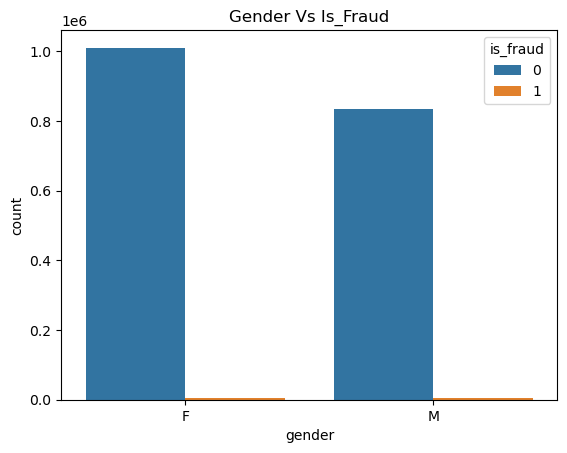

In [29]:
# first compare between category and is_fraud
sns.countplot(data = df, x = 'gender', hue = 'is_fraud')
plt.legend(title = 'is_fraud')
plt.title('Gender Vs Is_Fraud')

Text(0.5, 1.0, 'Age Distribution on Fraud')

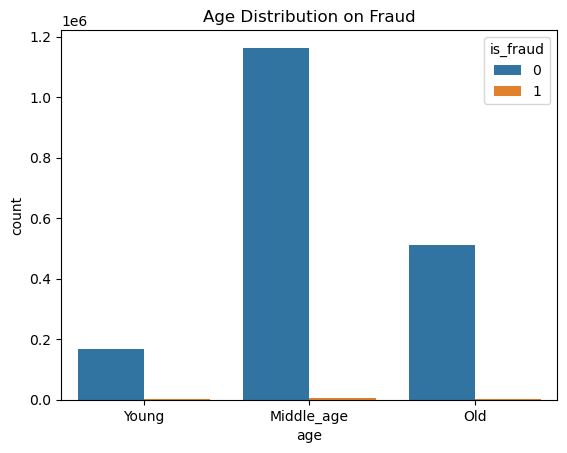

In [30]:
sns.countplot(data = df, x = 'age', hue = 'is_fraud', order = ['Young', 'Middle_age', 'Old'])
plt.legend(title = 'is_fraud')
plt.title('Age Distribution on Fraud')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'misc_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'entertainment'),
  Text(3, 0, 'gas_transport'),
  Text(4, 0, 'misc_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'shopping_net'),
  Text(7, 0, 'shopping_pos'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'personal_care'),
  Text(10, 0, 'health_fitness'),
  Text(11, 0, 'travel'),
  Text(12, 0, 'kids_pets'),
  Text(13, 0, 'home')])

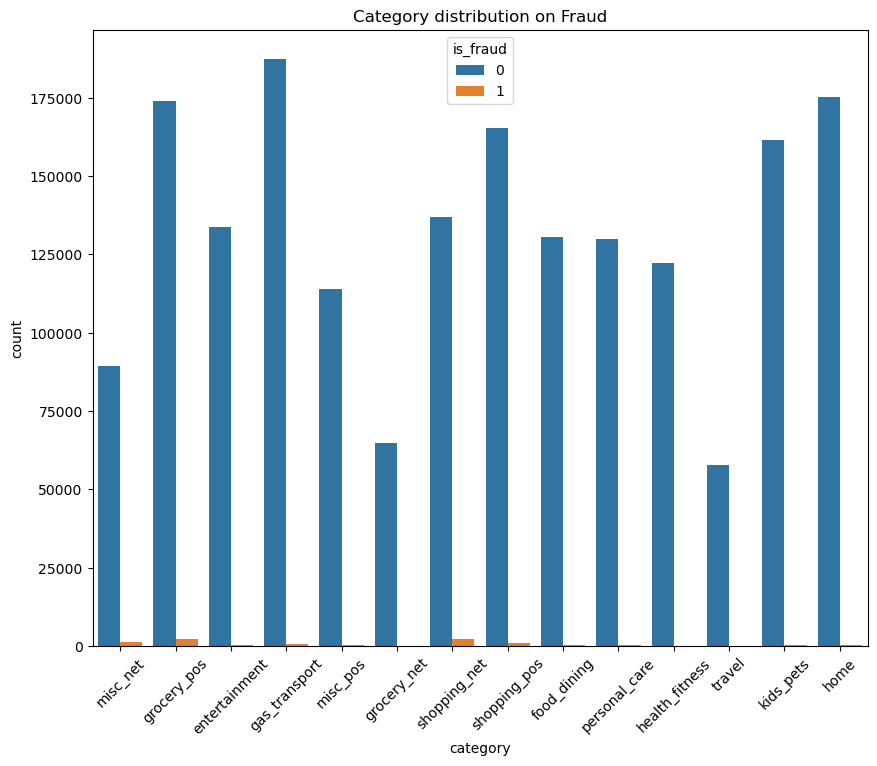

In [31]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'category', hue = 'is_fraud')
plt.legend(title = 'is_fraud')
plt.title("Category distribution on Fraud")
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Time of Day on Fraud')

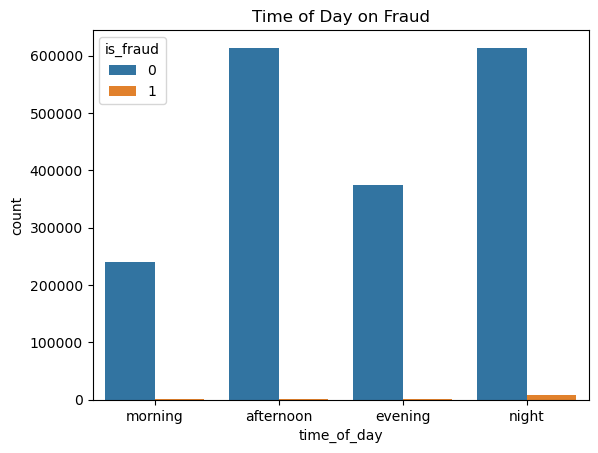

In [32]:
sns.countplot(data = df, x = 'time_of_day', hue = 'is_fraud', order = ['morning', 'afternoon', 'evening', 'night'])
plt.legend(title = 'is_fraud')
plt.title('Time of Day on Fraud')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'gas_transport'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'home'),
  Text(3, 0, 'shopping_pos'),
  Text(4, 0, 'kids_pets'),
  Text(5, 0, 'shopping_net'),
  Text(6, 0, 'entertainment'),
  Text(7, 0, 'food_dining'),
  Text(8, 0, 'personal_care'),
  Text(9, 0, 'health_fitness'),
  Text(10, 0, 'misc_pos'),
  Text(11, 0, 'misc_net'),
  Text(12, 0, 'grocery_net'),
  Text(13, 0, 'travel')])

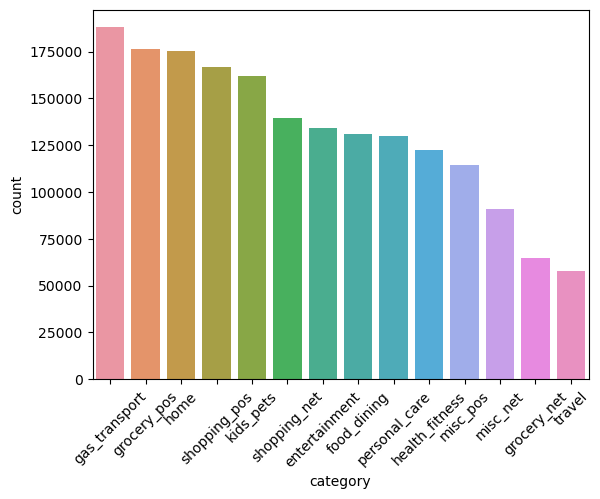

In [33]:
sns.countplot(data = df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation = 45)

#### One_hot Encoding

In [34]:
# Column to exclude from encoding
exclude_col = 'is_fraud'

# Extract the column to exclude
excluded_col_df = df[[exclude_col]]

In [35]:
excluded_col_df

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
1852389,0
1852390,0
1852391,0
1852392,0


In [36]:
encoded_df = pd.get_dummies(df.drop(columns=[exclude_col]))

In [37]:
encoded_df = encoded_df.astype(int)

In [38]:
encoded_df.head()

,amt,city_pop,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,category_travel,gender_F,gender_M,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night,age_Middle_age,age_Old,age_Young
0,4,3495,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,107,149,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,220,4154,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,45,1939,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,41,99,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [39]:
encoded_df1 = encoded_df.iloc[:, :2]
encoded_df2 = encoded_df.iloc[:, 2:]

In [40]:
# Concatenate the excluded column back
df = pd.concat([encoded_df1, excluded_col_df, encoded_df2], axis=1)

In [41]:
df.head()

,amt,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,category_travel,gender_F,gender_M,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night,age_Middle_age,age_Old,age_Young
0,4,3495,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,107,149,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,220,4154,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,45,1939,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,41,99,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [42]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [43]:
df.shape

(1852394, 26)

In [44]:
X = df.drop(['is_fraud'] , axis = 1)
y = df['is_fraud']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modeling

#### Logistic Regression

In [47]:
lr_model = LogisticRegression()

In [48]:
%%time
lr_model.fit(X_train, y_train)

CPU times: total: 44.1 s
Wall time: 18.4 s


LogisticRegression()

In [49]:
y_lr_pred = lr_model.predict(X_test)

In [50]:
accuracy_score(y_lr_pred, y_test)

0.9942866808584915

In [51]:
print(classification_report(y_lr_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    555482
           1       0.00      0.00      0.00       237

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       1.00      0.99      1.00    555719



#### We got 99.4% Accuracy in this model

#### KNeighbors Classifier

In [50]:
knc_model = KNeighborsClassifier()

In [51]:
%%time
knc_model.fit(X_train, y_train)

CPU times: total: 5.72 s
Wall time: 5.74 s


KNeighborsClassifier()

In [52]:
%%time
y_knc_pred = knc_model.predict(X_test)

CPU times: total: 9h 48min 31s
Wall time: 5h 2min 16s


In [53]:
accuracy_score(y_knc_pred, y_test)

0.995119835744324

In [54]:
print(classification_report(y_knc_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    554149
           1       0.31      0.57      0.40      1570

    accuracy                           1.00    555719
   macro avg       0.65      0.78      0.70    555719
weighted avg       1.00      1.00      1.00    555719



#### We got 99.5% Accuracy from this model after training it for 9 hours approx

#### Random Forest Classifier

In [45]:
rfc_model = RandomForestClassifier()

In [46]:
# Determine set of hyperparameters for random forest
rfc_params = {'n_estimators' : [50, 100, 150, 200], 
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50],
             'min_samples_split': [2, 4, 6],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

# scores = {'accuracy': 'accuracy' , 'precision':'precision', 'recall' : 'recall', 'f1':'f1'}

In [47]:
# rfc_gcv_model = GridSearchCV(rfc_model, rfc_params, scoring = scores)
rfc_gcv_model = GridSearchCV(rfc_model, rfc_params)

In [ ]:
%%time
rfc_gcv_model.fit(X_train, y_train)

In [ ]:
%%time
y_rfc_gcv_pred = rfc_gcv_model.predict(X_test)

In [ ]:
rfc_gcv_model.best_params_

In [ ]:
accuracy_score(y_rfc_gcv_pred, y_test)

In [ ]:
print(classification_report(y_rfc_gcv_pred, y_test))

#### I left this model as it took me around 7 to 8 hours more to train the model 

#### You can also try training this model without using Cross Validation which will take less time to train

#### Support Vector Classifier

In [47]:
svc_model = SVC()

In [48]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
%%time
svc_model.fit(X_train_scaled, y_train)

In [ ]:
%%time
y_svc_pred = svc_model.predict(X_test_scaled)

In [ ]:
accuracy_score(y_svc_pred, y_test)

In [ ]:
print(classification_report(y_svc_pred, y_test))

#### Same goes to this model too

#### You can also try training this model without Standardizing it. It may take less time to train

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Now we are having only 2 models and their accuracy scores are insane and matchs to 99%. But In a race there must be one winner and others are chasers so In my case of modeling the winner model is KNeighbours Classifier winning with 0.001% from Logistic Regression  

### Accuracy Scores of Our Successfully Compiled Models :->

### --> Logistic Regression 0.994 i.e., 99.4%  
### --> KNeighbours Classifier 0.995 i.e., 99.5%

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This book is just an analysis. If you want to make a model or a pickle file from it then my suggestion is either dont use encoding or else use label encoding as you will make a pickle file then you will also deploy it on a webapp then there it be like a bunch of input variables. You can also do some research on it. I am also currently working on right now on how to deploy it without changing the one hot encoding part.  

#### Peace! Happy Training